In [1]:
# importing necessary packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
# fully connected layers

In [74]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

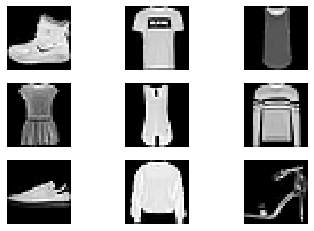

In [4]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k],cmap = "gray")
    plt.axis('off')
plt.show()

In [5]:
y_train_full[:9]

array([9, 0, 0, 3, 0, 2, 7, 2, 5], dtype=uint8)

In [75]:
#we want test, train, validation
X_valid = X_train_full[:5000]/255.0
X_train = X_train_full[5000:]/255.0
X_test = X_test/255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [76]:
from functools import partial
my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.00001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    my_dense_layer(300),
    my_dense_layer(150),
    my_dense_layer(50),
    my_dense_layer(10, activation="softmax")
])

In [77]:
model.compile(loss="sparse_categorical_crossentropy", #what is the probability of our prediction
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [78]:
history = model.fit(X_train, y_train, epochs=20, validation_data=[X_valid,y_valid])
#use greater number of epochs

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 29s 529us/sample - loss: 0.6267 - accuracy: 0.7928 - val_loss: 0.4376 - val_accuracy: 0.8524
Epoch 2/20
55000/55000 [==============================] - 26s 464us/sample - loss: 0.4242 - accuracy: 0.8536 - val_loss: 0.4012 - val_accuracy: 0.8596
Epoch 3/20
55000/55000 [==============================] - 27s 487us/sample - loss: 0.3831 - accuracy: 0.8666 - val_loss: 0.3566 - val_accuracy: 0.8728
Epoch 4/20
55000/55000 [==============================] - 30s 541us/sample - loss: 0.3572 - accuracy: 0.8743 - val_loss: 0.3525 - val_accuracy: 0.8742
Epoch 5/20
55000/55000 [==============================] - 27s 487us/sample - loss: 0.3346 - accuracy: 0.8828 - val_loss: 0.3375 - val_accuracy: 0.8806
Epoch 6/20
55000/55000 [==============================] - 30s 541us/sample - loss: 0.3169 - accuracy: 0.8893 - val_loss: 0.3346 - val_accuracy: 0.8850
Epoch 7/20
55000/55000 [=====================

Text(0.5, 0, 'Epochs')

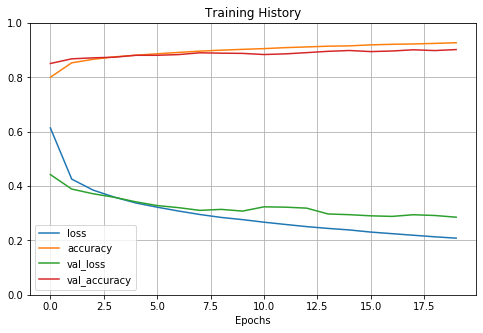

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.title('Training History')
plt.xlabel('Epochs')

In [50]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[5109    6   65   63   15    1  280    0    4    0]
 [   0 5405    0   28    6    0    5    0    0    0]
 [  36    1 4862   28  402    0  164    0    3    0]
 [  73   15   51 5107  185    0   65    0    2    1]
 [   4    4  264   71 4991    0  174    0    4    0]
 [   0    0    0    0    0 5466    1   39    0    1]
 [ 507    5  276   75  272    0 4363    0    9    0]
 [   0    0    0    0    0   12    0 5438    1   37]
 [   3    2    9    2   10    0   10    5 5469    0]
 [   0    0    0    0    0    7    0  168    1 5318]]


In [58]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3436627036333084, 0.8803]

In [52]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[865   0  22  21   6   0  78   2   6   0]
 [  4 972   1  17   2   0   3   0   1   0]
 [ 15   1 823  12  91   0  56   1   1   0]
 [ 22  10  19 879  40   0  26   0   4   0]
 [  1   1  77  20 850   0  50   0   1   0]
 [  0   0   0   1   0 962   0  27   0  10]
 [124   3  75  25  70   0 692   0  11   0]
 [  0   0   0   0   0  10   0 972   0  18]
 [  6   0   6   5   5   1   2   8 967   0]
 [  0   0   0   0   0   8   1  51   0 940]]
